<a href="https://colab.research.google.com/github/OfficialMarvin/IWT/blob/main/Kenya_Process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datascience import *
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.7/dist-packages/datascience/tables.py:17: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)
/usr/local/lib/python3.7/dist-packages/datascience/util.py:10: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
     |████████████████████████████████| 133.1 MB 12 kB/s 
     |████████████████████████████████| 6.3 MB 29.0 MB/s 
     |████████████████████████████████| 219 kB 67.3 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759610 sha256=ec3dfde8fdfb8cd16456901d14b91d3d391345fe4033ebf65b93b1ac8d2bf57f
  Stored in directory: /tmp/pip-ephem-wheel-cache-7uqtxkpl/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp:

     |████████████████████████████████| 2.8 MB 31.1 MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp37-cp37m-linux_x86_64.whl size=3702480 sha256=679d26db1b2ee71deb235e53d499409b63b69b13afbddc909a76a20c8818422c
  Stored in directory: /root/.cache/pip/wheels/08/60/55/38382877bab48a6abfca7bd66115e287ce5a9530cbce631771
Successfully built pyproj
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.2.0
    Uninstalling pyproj-3.2.0:
      Successfully uninstalled pyproj-3.2.0
Mounted at /content/drive


In [ ]:
#import kenya-locations.csv
from google.colab import files
uploaded = files.upload()

Saving kenya-locations.csv to kenya-locations.csv


In [ ]:
#import kenya-data.csv
from google.colab import files
uploaded = files.upload()

Saving kenya-data.csv to kenya-data.csv


In [ ]:
data = pd.read_csv("/content/kenya-locations.csv") #import data
data2 = pd.read_csv("/content/kenya-data.csv") #import data

In [ ]:
data = pd.merge(data2, data, on ='Report ID', how = 'left')
data

,Report ID,Category of Incident_x,Country of Incident_x,Date of Incident_x,Subject_x,Primary Source,Source Type,Additional Sources,Name of Organisation Providing Information,Transport Mode,Where Found,Method of Concealment,Method of Concealment - Details,Detection,Outcome,Number of People Charged,Number of People Fined,Number of People Imprisoned,Amount of Fine,Currency of Fine,Fine in USD,Length of Imprisonment,Unit of Time,Category of Incident_y,Country of Incident_y,Date of Incident_y,Subject_y,Role,Order in Trade Route,Comments,Building/Place Name,Building Place/Name Alias,Street Address,Village/Commune/Ward,City/Town/Sub-district/Municipality,County/District/Prefecture/Department,State/Province/Region,Country,Latitude,Longitude,Transit Type
0,MOR11616,1. Seizure,Uganda,2017-08-18 00:00:00,12 rhino horn (23 kg) seized at Entebbe Intern...,http://www.observer.ug/news/headlines/54481-vi...,Media,NaN,C4ADS Air Seizure Database,Air,In Personal Baggage,Amongst other goods,Suspect travelled from Kenya to Uganda by land...,Dogs,Charged - No further details,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1. Seizure,Uganda,2017-08-18 00:00:00,12 rhino horn (23 kg) seized at Entebbe Intern...,Origin Location,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kenya,-0.023559,37.906193,NaN
1,MOR11616,1. Seizure,Uganda,2017-08-18 00:00:00,12 rhino horn (23 kg) seized at Entebbe Intern...,http://www.observer.ug/news/headlines/54481-vi...,Media,NaN,C4ADS Air Seizure Database,Air,In Personal Baggage,Amongst other goods,Suspect travelled from Kenya to Uganda by land...,Dogs,Charged - No further details,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1. Seizure,Uganda,2017-08-18 00:00:00,12 rhino horn (23 kg) seized at Entebbe Intern...,Discovery Location,NaN,NaN,Entebbe International Airport,EBB,NaN,NaN,Entebbe,Wakiso,NaN,Uganda,0.045052,32.442822,Airport
2,MOR11616,1. Seizure,Uganda,2017-08-18 00:00:00,12 rhino horn (23 kg) seized at Entebbe Intern...,http://www.observer.ug/news/headlines/54481-vi...,Media,NaN,C4ADS Air Seizure Database,Air,In Personal Baggage,Amongst other goods,Suspect travelled from Kenya to Uganda by land...,Dogs,Charged - No further details,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1. Seizure,Uganda,2017-08-18 00:00:00,12 rhino horn (23 kg) seized at Entebbe Intern...,Transit Location,NaN,NaN,NaN,NaN,NaN,NaN,Doha,NaN,NaN,Qatar,25.291609,51.530437,NaN
3,MOR11616,1. Seizure,Uganda,2017-08-18 00:00:00,12 rhino horn (23 kg) seized at Entebbe Intern...,http://www.observer.ug/news/headlines/54481-vi...,Media,NaN,C4ADS Air Seizure Database,Air,In Personal Baggage,Amongst other goods,Suspect travelled from Kenya to Uganda by land...,Dogs,Charged - No further details,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1. Seizure,Uganda,2017-08-18 00:00:00,12 rhino horn (23 kg) seized at Entebbe Intern...,Destination Location,NaN,NaN,NaN,NaN,NaN,NaN,Ha Noi,NaN,Ha Noi,Viet Nam,21.027763,105.834160,NaN
4,MOR11616,1. Seizure,Uganda,2017-08-18 00:00:00,12 rhino horn (23 kg) seized at Entebbe Intern...,http://www.observer.ug/news/headlines/54481-vi...,Media,NaN,C4ADS Air Seizure Database,Air,In Personal Baggage,Amongst other goods,Suspect travelled from Kenya to Uganda by land...,Dogs,Charged - No further details,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1. Seizure,Uganda,2017-08-18 00:00:00,12 rhino horn (23 kg) seized at Entebbe Intern...,Transit Location,NaN,NaN,Entebbe International Airport,EBB,NaN,NaN,Entebbe,Wakiso,NaN,Uganda,0.045052,32.442822,Airport
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,MOR8807,9. Enforcement Action / Prosecution,Kenya,2017-04-24 00:00:00,18 suspects arrested in Kenya (various) in ant...,http://news.xinhuanet.com/english/2017-05/06/c...,Media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9. Enforcement Action / Prosecution,Kenya,2017-04-24 00:00:00,18 suspects arrested in Kenya (various) in ant...,Arrested at,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Makueni

In [ ]:
type(data)
data = data[data['Country'] == "Kenya"]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 218
Data columns (total 41 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Report ID                                   166 non-null    object 
 1   Category of Incident_x                      166 non-null    object 
 2   Country of Incident_x                       166 non-null    object 
 3   Date of Incident_x                          166 non-null    object 
 4   Subject_x                                   166 non-null    object 
 5   Primary Source                              166 non-null    object 
 6   Source Type                                 166 non-null    object 
 7   Additional Sources                          60 non-null     object 
 8   Name of Organisation Providing Information  20 non-null     object 
 9   Transport Mode                              81 non-null     object 
 10  Where Found   

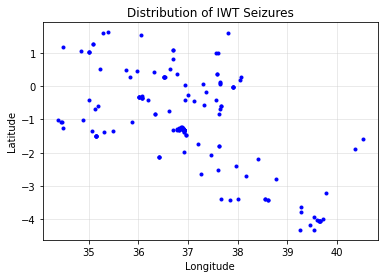

In [ ]:
_=plt.plot(data['Longitude'], data['Latitude'],
             marker='.', linewidth=0, color = '#0000FF')
_=plt.grid(which='major', color="#cccccc", alpha = .5)
_=plt.title("Distribution of IWT Seizures")
_=plt.xlabel("Longitude")
_=plt.ylabel("Latitude")
_=plt.show()

In [ ]:
dbscan_data = data[['Longitude', 'Latitude']]
dbscan_data = dbscan_data.values.astype('float32', copy=False)
dbscan_data_scaler = StandardScaler().fit(dbscan_data)
dbscan_data = dbscan_data_scaler.transform(dbscan_data)
dbscan_data

array([[ 0.73059535,  0.7803528 ],
       [-0.11335956, -0.14489238],
       [-1.5330207 ,  0.4920363 ],
       [-0.03428028, -0.15746595],
       [-0.03428028, -0.15746595],
       [ 0.02341569,  0.60245436],
       [-1.4250653 , -0.27822763],
       [-1.4250653 , -0.27822763],
       [-0.0062316 , -0.2676082 ],
       [-0.05224905, -0.10439906],
       [ 0.73059535,  0.7803528 ],
       [ 1.9368223 , -2.216045  ],
       [ 2.1507745 , -2.0945873 ],
       [-1.9504645 ,  0.02585625],
       [ 0.18644749, -0.45251024],
       [ 0.93351215, -1.1457217 ],
       [-0.26726112,  0.267557  ],
       [ 0.51592267, -0.49225858],
       [-0.03428028, -0.15746595],
       [-0.03428028, -0.15746595],
       [ 2.0106175 , -2.3202515 ],
       [-1.536084  ,  1.5333287 ],
       [-1.3146627 ,  1.9468976 ],
       [-1.4653401 ,  1.7029697 ],
       [-1.4653401 ,  1.7029697 ],
       [-0.69193864,  0.5326733 ],
       [-0.4956039 ,  0.20123874],
       [-0.21889487,  1.3935269 ],
       [-1.9646645 ,

In [ ]:
model = DBSCAN(eps=.35,min_samples=10,metric='euclidean').\
fit(dbscan_data)
model

DBSCAN(algorithm='auto', eps=0.35, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

In [ ]:
outliers_df = data[model.labels_ == -1]
clusters_df = data[model.labels_ != -1]
colors = model.labels_
colors_clusters = colors[colors != -1]
color_outliers = "white"
clusters = Counter(model.labels_)
print(clusters)
print(data[model.labels_ == -1].head())
print("num of clusters = {}".format(len(clusters)-1))

Counter({-1: 71, 0: 50, 2: 13, 1: 13, 3: 11, 4: 8})
   Report ID            Category of Incident_x  ...  Longitude Transit Type
6   MOR13710                        1. Seizure  ...  35.005554          NaN
12  MOR14192  2. Poaching / Illegal Harvesting  ...  35.143890          NaN
13  MOR14192  2. Poaching / Illegal Harvesting  ...  35.143890          NaN
19  MOR15668                        1. Seizure  ...  34.470634          NaN
21  MOR15789                        1. Seizure  ...  38.166214          NaN

[5 rows x 41 columns]
num of clusters = 5


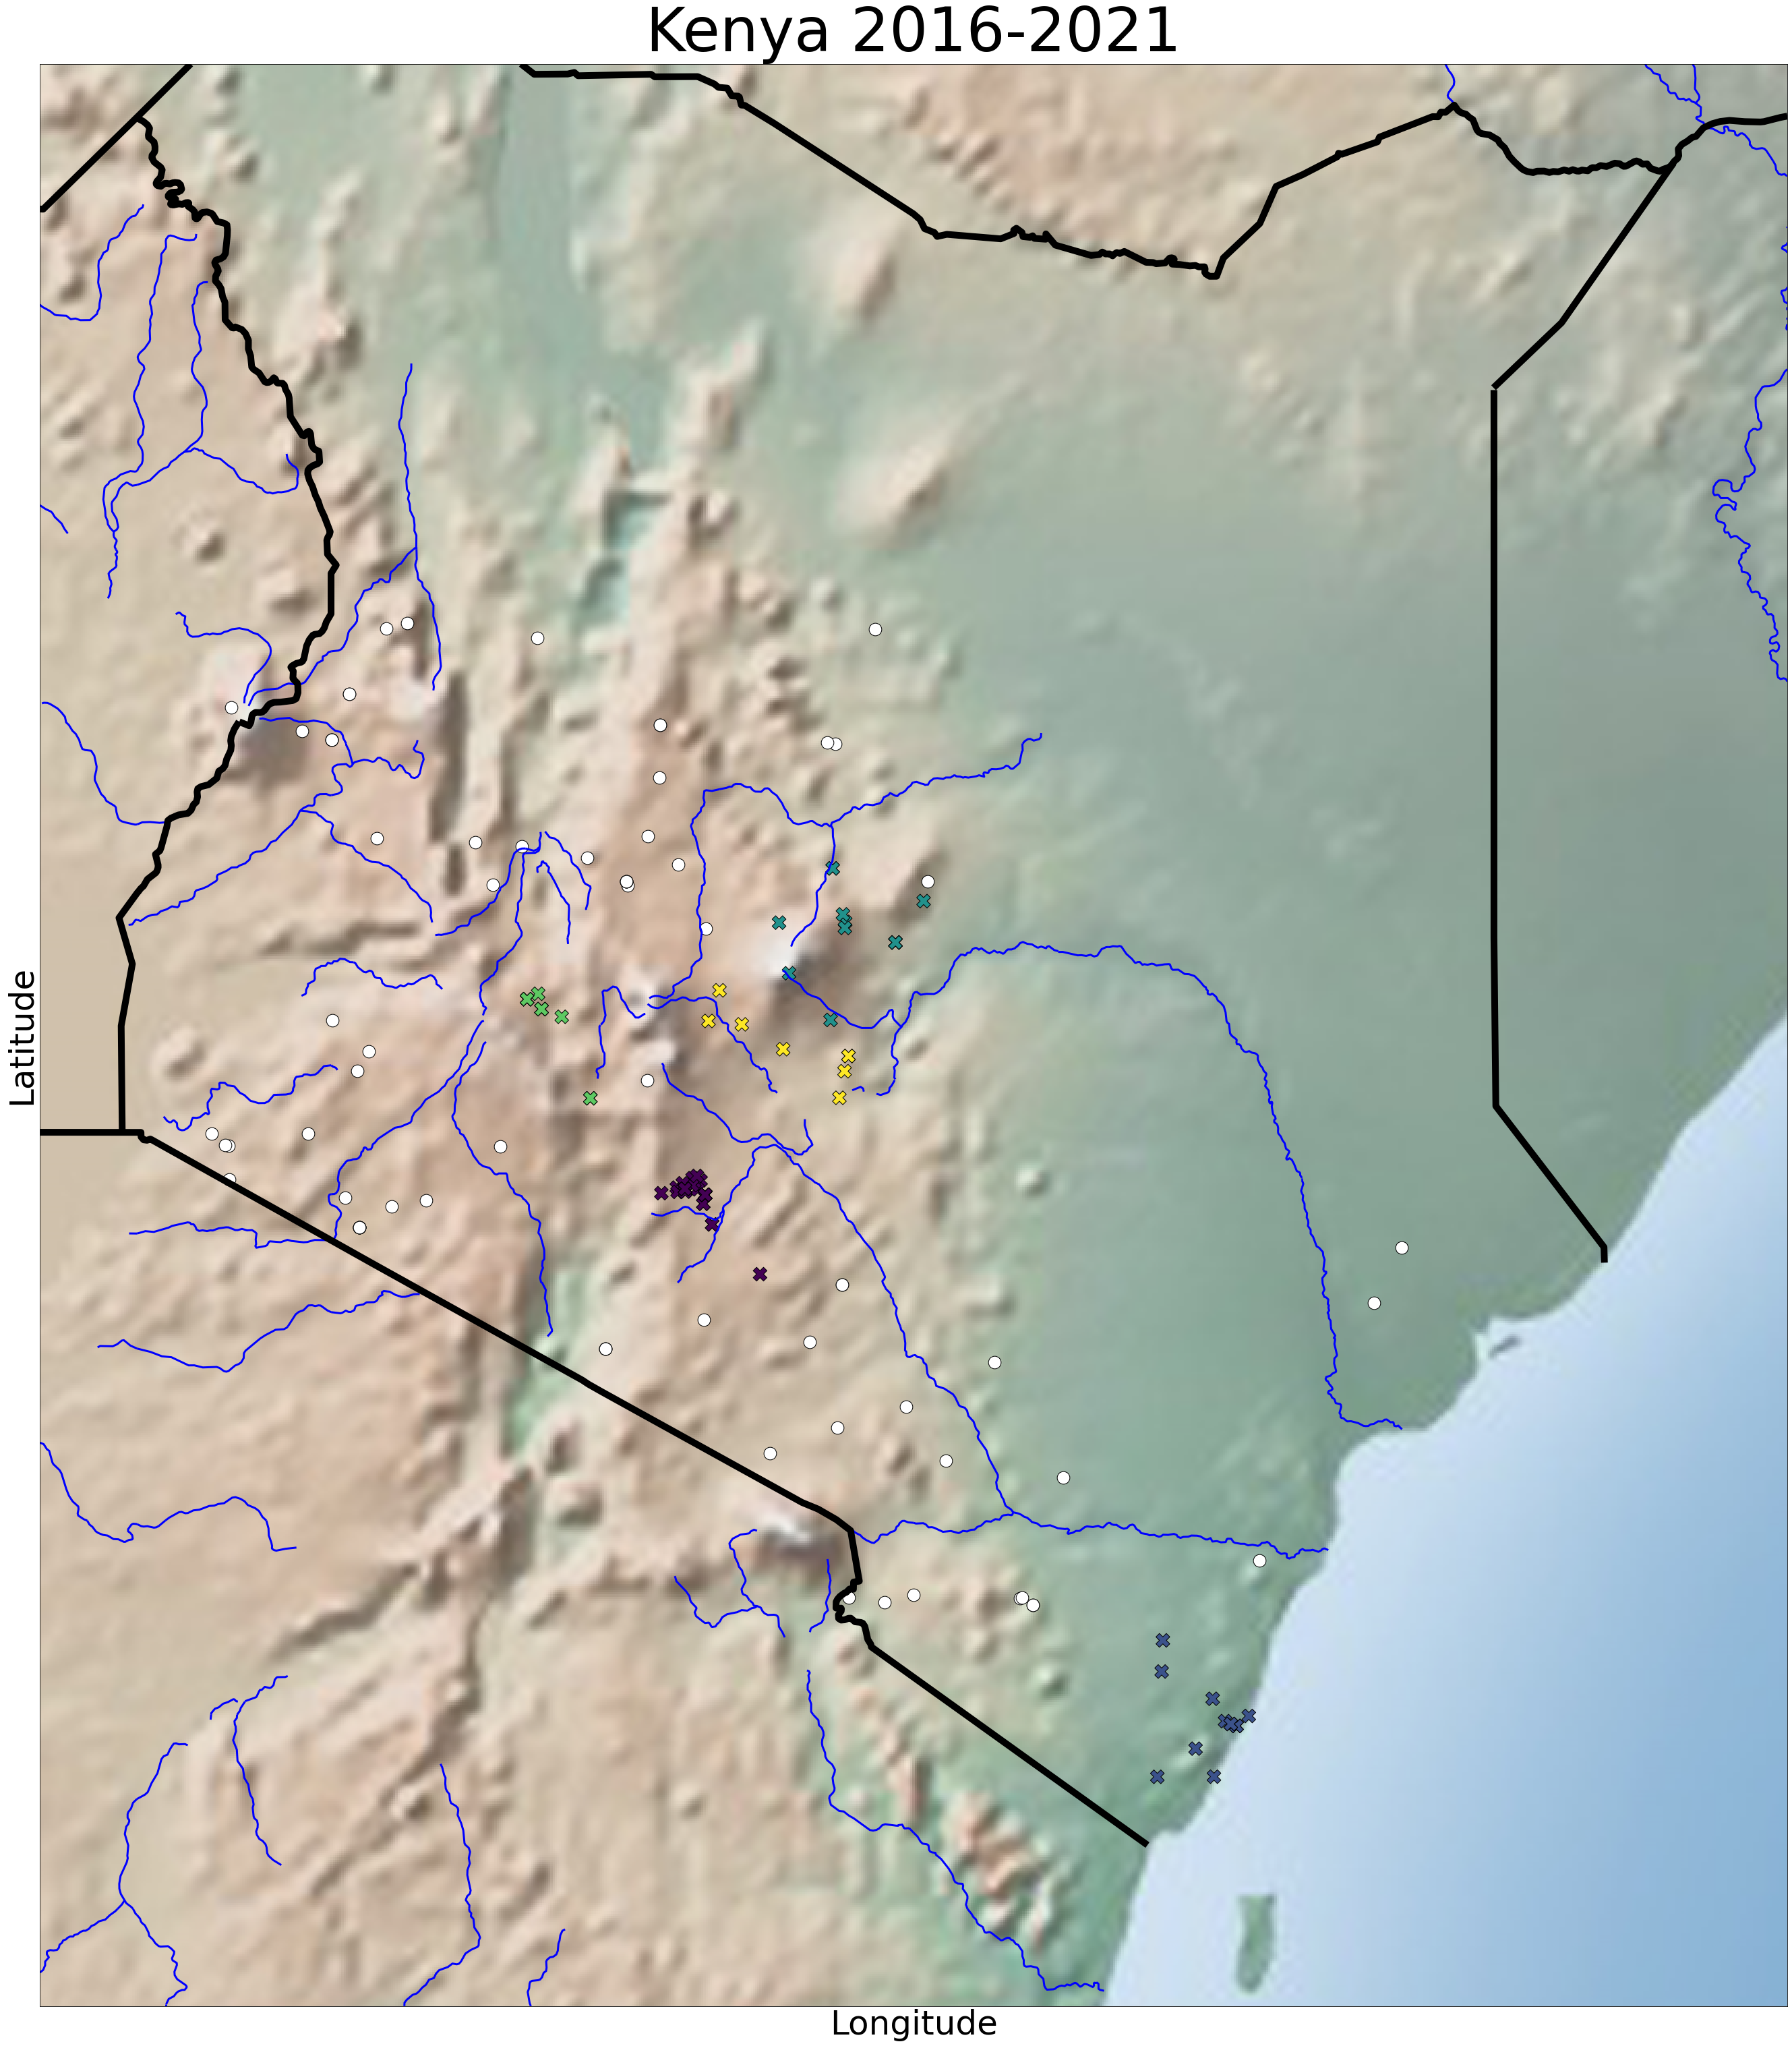

In [ ]:

fig = plt.figure()
ax = fig.add_axes([1,1,10,10])
m = Basemap(projection= "cyl", llcrnrlon=33.5,llcrnrlat=-5.5,urcrnrlon=42.5,urcrnrlat=4.5, resolution= "h")
m.drawrivers(linewidth=3,color="blue")
m.shadedrelief(scale=3)
m.drawcountries(linewidth=10)
ax.scatter(clusters_df['Longitude'], clusters_df['Latitude'],
           c = colors_clusters, edgecolors = 'black', s=420,marker="X", urls=clusters_df['Primary Source'])
ax.scatter(outliers_df['Longitude'], outliers_df['Latitude'],
           c = color_outliers, edgecolors = 'black', s=350)
ax.set_xlabel('Longitude', fontsize=50)
ax.set_ylabel('Latitude',  fontsize=50)
plt.title("Kenya 2016-2021", fontsize=90)
plt.grid(which='major',color="#cccccc", alpha=.0)
plt.show()


In [ ]:
short = data[['Longitude', 'Latitude','Number of People Charged', "Primary Source"]]
print(short.to_string())

     Longitude  Latitude  Number of People Charged                                                                                                                                                                   Primary Source
0    37.906193 -0.023559                       NaN                                                                      http://www.observer.ug/news/headlines/54481-vietnamese-man-arrested-with-23kg-of-rhino-horn-at-entebbe.html
5    36.824734 -1.305292                       2.0                                                                  https://www.africanindy.com/news/pair-in-their-60s-arrested-for-possession-of-leopard-skins-in-nairobi-12207630
6    35.005554 -0.422961                       1.0                                                                                             https://citizentv.co.ke/news/ex-police-officer-arraigned-in-court-over-theft-197674/
7    36.926067 -1.322710                       1.0                                      

Manually update number charged via URLs

Use GIS program to spatial join Long/Lang with urban shapefile from World Resources Institute

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files
uploaded = files.upload()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving KenyaChargedPoints.xlsx to KenyaChargedPoints.xlsx


In [ ]:
import pandas as pd
data = pd.read_excel("/content/KenyaChargedPoints.xlsx")

Final Calculations

In [ ]:
urban = data.loc[data['LCID'] == "UR"]
urban["Number"].mean()

1.5961538461538463

In [ ]:
rural = data[data['LCID'].isnull()]
rural["Number"].mean()

3.488888888888889